<a href="https://colab.research.google.com/github/Isometric1/ML/blob/main/Joke%20Rating%20Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
from math import *
! pip install catboost
from sklearn.model_selection import train_test_split
import numpy as np
from catboost import CatBoostRegressor
from sklearn.metrics import mean_absolute_error,mean_absolute_percentage_error

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 76.6 MB 1.2 MB/s 


In [5]:
! gdown --id 1M94AhLJ9mrIsoXfr6iwJmnigNDHXnSI2
! gdown --id 10AtXobKBYWjt9jG7hquZYfG7SN7Zzm0A

/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=1M94AhLJ9mrIsoXfr6iwJmnigNDHXnSI2
To: /content/first.zip
100% 9.78M/9.78M [00:00<00:00, 150MB/s]
/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=10AtXobKBYWjt9jG7hquZYfG7SN7Zzm0A
To: /content/second.zip
100% 3.65M/3.65M [00:00<00:00, 214MB/s]


In [6]:
! unzip  /content/first.zip -d /content/first
! unzip  /content/second.zip -d /content/second

Archive:  /content/first.zip
  inflating: /content/first/jokes.csv  
  inflating: /content/first/train.csv  
Archive:  /content/second.zip
  inflating: /content/second/test.csv  


In [46]:
train = pd.read_csv('/content/first/train.csv')
test = pd.read_csv('/content/second/test.csv')
jokes = pd.read_csv('/content/first/jokes.csv')

In [47]:
train.head(10)

,id,user_id,joke_id,Rating
0,31030_110,31030,110,2.750
1,16144_109,16144,109,5.094
2,23098_6,23098,6,-6.438
3,14273_86,14273,86,4.406
4,18419_134,18419,134,9.375
5,5782_14,5782,14,-1.781
6,34059_62,34059,62,6.250
7,1159_9,1159,9,-2.906
8,17736_32,17736,32,-5.750
9,22626_22,22626,22,1.656


In [48]:
train = train.merge(jokes, left_on='joke_id', right_on='joke_id')

In [49]:
train.head()

,id,user_id,joke_id,Rating,joke_text
0,31030_110,31030,110,2.750,"Judy was having trouble with her computer, so ..."
1,9137_110,9137,110,1.719,"Judy was having trouble with her computer, so ..."
2,27649_110,27649,110,5.031,"Judy was having trouble with her computer, so ..."
3,35355_110,35355,110,3.031,"Judy was having trouble with her computer, so ..."
4,5478_110,5478,110,3.094,"Judy was having trouble with her computer, so ..."


In [50]:
test = test.merge(jokes, left_on='joke_id', right_on='joke_id')

In [51]:
test.head()

,id,user_id,joke_id,joke_text
0,6194_11,6194,11,What's the difference between a used tire and ...
1,13494_11,13494,11,What's the difference between a used tire and ...
2,35167_11,35167,11,What's the difference between a used tire and ...
3,25066_11,25066,11,What's the difference between a used tire and ...
4,25103_11,25103,11,What's the difference between a used tire and ...


In [52]:
train.head()


,id,user_id,joke_id,Rating,joke_text
0,31030_110,31030,110,2.750,"Judy was having trouble with her computer, so ..."
1,9137_110,9137,110,1.719,"Judy was having trouble with her computer, so ..."
2,27649_110,27649,110,5.031,"Judy was having trouble with her computer, so ..."
3,35355_110,35355,110,3.031,"Judy was having trouble with her computer, so ..."
4,5478_110,5478,110,3.094,"Judy was having trouble with her computer, so ..."


In [53]:
def error(real, prediction):
  print(mean_absolute_error(real,prediction))
  print(mean_absolute_percentage_error(real,prediction))

In [54]:
cat_features = ['joke_text','id']
X = ['id','user_id','joke_id','joke_text']
Y = ['Rating']

0:	learn: 0.9390731	total: 406ms	remaining: 6m 45s
100:	learn: 0.9865792	total: 1m 1s	remaining: 9m 7s
200:	learn: 0.9865362	total: 2m 5s	remaining: 8m 16s
300:	learn: 0.9864547	total: 3m 9s	remaining: 7m 20s
400:	learn: 0.9861916	total: 4m 15s	remaining: 6m 21s
500:	learn: 0.9860810	total: 5m 19s	remaining: 5m 18s
600:	learn: 0.9858834	total: 6m 25s	remaining: 4m 15s
700:	learn: 0.9858008	total: 7m 29s	remaining: 3m 11s
800:	learn: 0.9856327	total: 8m 34s	remaining: 2m 7s
900:	learn: 0.9854648	total: 9m 40s	remaining: 1m 3s
999:	learn: 0.9852925	total: 10m 45s	remaining: 0us
3.9874796956237026
19693957471160.45


,id,user_id,joke_id,Rating,joke_text,rating_prediction,diff_abs
837392,6146_43,6146,43,-9.875,One Sunday morning William burst into the livi...,4.526703,14.401703
120149,6028_22,6028,22,-9.469,A man arrives at the gates of heaven. St. Pete...,4.821576,14.290576
812562,33919_59,33919,59,-9.969,"This guy's wife asks, ""Honey, if I died would ...",4.026818,13.995818
1059569,1659_131,1659,131,9.094,Jack Bauer can get McDonald's breakfast after ...,-4.885110,13.979110
190098,17915_95,17915,95,-9.719,A couple of hunters are out in the woods in th...,4.239712,13.958712
198290,20200_95,20200,95,-9.844,A couple of hunters are out in the woods in th...,4.096641,13.940641
670589,12306_52,12306,52,-10.000,A group of managers were given the assignment ...,3.913800,13.913800
344036,33368_124,33368,124,-9.781,An artist asked the gallery owner if there had...,4.128003,13.909003
202183,35710_95,35710,95,-9.750,A couple of hunters are out in the woods in th...,4.140189,13.890189
72037,13599_62,13599,62,-9.844,"On the first day of college, the Dean addresse...",4.020904,13.864904


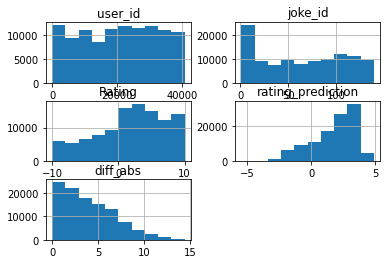

In [55]:
train, test1 = train_test_split(train, train_size = 0.9,random_state=36)
model = CatBoostRegressor(cat_features = cat_features, loss_function = 'RMSE', eval_metric= 'MAPE', random_state= 36, early_stopping_rounds= 100,learning_rate = 0.25, verbose = 100)
model.fit(train[X], train[Y])
test1['rating_prediction'] = model.predict(test1[X])
error(test1['Rating'], test1['rating_prediction'])
test1['diff_abs'] = abs(test1['rating_prediction'] - test1['Rating'])
test1.hist()
test1.sort_values('diff_abs',ascending = False).head(10)


In [59]:
test['Rating'] = model.predict(test[X])

In [60]:
test[['id','Rating']]

,id,Rating
0,6194_11,3.818849
1,13494_11,2.747859
2,35167_11,3.132494
3,25066_11,3.223531
4,25103_11,3.223531
...,...,...
537875,446_51,0.951168
537876,332_51,1.642049
537877,437_51,0.951168
537878,125_51,1.058294


In [61]:
test[['id','Rating']].to_csv('/content/prediction2.csv')